In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *

In [27]:
data = list()
no_call_data = []
tools=["arcas","hlaforest","seq2hla","hlahd","phlat","T1K", "hisat","hlavbseq",'hlaminer'] # optitype excluded bc only class I
#datasets=["1","d2","d3","d4","d5","d6"]
for t in tools:
    total = []
    no_call=[]
    
    for d in range(1,7):
        gs=pd.read_csv("../datasets/"+str(d)+"_gs.csv")
        pre=pd.read_csv("../results/standard/"+str(t)+"_d"+str(d)+".csv")
        
        for gene in ["A", "B", "C", "DQB1", "DRB1"]:
            target = gene + ".1"
            if (target not in pre.columns):
                continue
            pre[target].fillna(pre[gene], inplace=True)
            
        ret=compute_matches(pre,gs)
        print(t,"d"+str(d),ret[:3],ret[3])
        total.append(ret[:3])
        no_call.append(ret[3])
    data.append(total)
    no_call_data.append(no_call)

arcas d1 ([38, 6], [144, 127], [2758, 1827]) 0
arcas d2 ([0, 4], [0, 5], [0, 163]) 0
arcas d3 ([9, 0], [88, 0], [203, 0]) 0
arcas d4 ([0, 0], [0, 0], [0, 4]) 24
arcas d5 ([0, 0], [0, 0], [8, 0]) 0
arcas d6 ([3, 0], [0, 0], [5, 0]) 0
hlaforest d1 ([90, 40], [492, 230], [2358, 1690]) 0
hlaforest d2 ([0, 5], [0, 26], [0, 141]) 0
hlaforest d3 ([22, 0], [39, 0], [239, 0]) 0
entered
entered
hlaforest d4 ([0, 10], [0, 4], [0, 10]) 4
hlaforest d5 ([0, 0], [0, 0], [8, 0]) 0
hlaforest d6 ([4, 0], [2, 0], [2, 0]) 0
seq2hla d1 ([35, 114], [104, 192], [2801, 1654]) 0
entered
entered
seq2hla d2 ([0, 55], [0, 18], [0, 95]) 4
seq2hla d3 ([14, 0], [25, 0], [261, 0]) 0
seq2hla d4 ([0, 21], [0, 1], [0, 6]) 0
seq2hla d5 ([0, 0], [2, 0], [6, 0]) 0
seq2hla d6 ([4, 0], [1, 0], [3, 0]) 0
hlahd d1 ([34, 15], [104, 82], [2802, 1863]) 0
hlahd d2 ([0, 4], [0, 5], [0, 163]) 0
hlahd d3 ([15, 0], [90, 0], [195, 0]) 0
hlahd d4 ([0, 6], [0, 1], [0, 11]) 10
hlahd d5 ([0, 0], [0, 0], [8, 0]) 0
hlahd d6 ([4, 0], [0, 0], 

In [28]:
data = np.array(data)

formatted_data = [tools,data[:,0],data[:,1],data[:,2],data[:,3],data[:,4],data[:,5]]
df = pd.DataFrame(formatted_data)

df

,0,1,2,3,4,5,6,7,8
0,arcas,hlaforest,seq2hla,hlahd,phlat,T1K,hisat,hlavbseq,hlaminer
1,"[[38, 6], [144, 127], [2758, 1827]]","[[90, 40], [492, 230], [2358, 1690]]","[[35, 114], [104, 192], [2801, 1654]]","[[34, 15], [104, 82], [2802, 1863]]","[[86, 406], [272, 136], [2582, 1418]]","[[13, 7], [43, 92], [2884, 1861]]","[[68, 32], [56, 100], [2816, 1828]]","[[284, 1873], [218, 35], [2438, 50]]","[[2356, 1315], [389, 418], [183, 195]]"
2,"[[0, 4], [0, 5], [0, 163]]","[[0, 5], [0, 26], [0, 141]]","[[0, 55], [0, 18], [0, 95]]","[[0, 4], [0, 5], [0, 163]]","[[0, 4], [0, 12], [0, 156]]","[[0, 4], [0, 5], [0, 163]]","[[0, 5], [0, 7], [0, 160]]","[[0, 82], [0, 4], [0, 86]]","[[0, 99], [0, 43], [0, 22]]"
3,"[[9, 0], [88, 0], [203, 0]]","[[22, 0], [39, 0], [239, 0]]","[[14, 0], [25, 0], [261, 0]]","[[15, 0], [90, 0], [195, 0]]","[[13, 0], [39, 0], [248, 0]]","[[12, 0], [80, 0], [208, 0]]","[[27, 0], [67, 0], [206, 0]]","[[32, 0], [27, 0], [241, 0]]","[[228, 0], [41, 0], [21, 0]]"
4,"[[0, 0], [0, 0], [0, 4]]","[[0, 10], [0, 4], [0, 10]]","[[0, 21], [0, 1], [0, 6]]","[[0, 6], [0, 1], [0, 11]]","[[0, 7], [0, 2], [0, 5]]","[[0, 9], [0, 1], [0, 18]]","[[0, 10], [0, 0], [0, 10]]","[[0, 22], [0, 0], [0, 2]]","[[0, 11], [0, 6], [0, 1]]"
5,"[[0, 0], [0, 0], [8, 0]]","[[0, 0], [0, 0], [8, 0]]","[[0, 0], [2, 0], [6, 0]]","[[0, 0], [0, 0], [8, 0]]","[[0, 0], [0, 0], [8, 0]]","[[0, 0], [0, 0], [8, 0]]","[[0, 0], [0, 0], [8, 0]]","[[0, 0], [0, 0], [8, 0]]","[[8, 0], [0, 0], [0, 0]]"
6,"[[3, 0], [0, 0], [5, 0]]","[[4, 0], [2, 0], [2, 0]]","[[4, 0], [1, 0], [3, 0]]","[[4, 0], [0, 0], [4, 0]]","[[4, 0], [0, 0], [4, 0]]","[[4, 0], [0, 0], [4, 0]]","[[4, 0], [0, 0], [4, 0]]","[[0, 0], [0, 0], [8, 0]]","[[1, 0], [2, 0], [5, 0]]"


In [29]:
no_call_data = np.array(no_call_data)
no_call_data

array([[ 0,  0,  0, 24,  0,  0],
       [ 0,  0,  0,  4,  0,  0],
       [ 0,  4,  0,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  0],
       [ 0,  0,  0, 14,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  8,  0,  0],
       [ 2,  0,  0,  4,  0,  0],
       [43,  8, 10, 10,  0,  0]])

/var/folders/j4/pd1pbcl90xz683wfkd2drjqw0000gn/T/ipykernel_80008/3946601476.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[r][c].set_xticklabels(labels = labels, rotation = 45)
/var/folders/j4/pd1pbcl90xz683wfkd2drjqw0000gn/T/ipykernel_80008/3946601476.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[r][c].set_xticklabels(labels = labels, rotation = 45)
/var/folders/j4/pd1pbcl90xz683wfkd2drjqw0000gn/T/ipykernel_80008/3946601476.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[r][c].set_xticklabels(labels = labels, rotation = 45)
/var/folders/j4/pd1pbcl90xz683wfkd2drjqw0000gn/T/ipykernel_80008/3946601476.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[r][c].set_xticklabels(labels = labels, rotation = 45)
/var/folders/j4/pd1pbcl90xz683wfkd2drjqw0000gn/T/ipykernel_80008/3946601476.py:30: UserWarning: FixedFormatter should only be used t

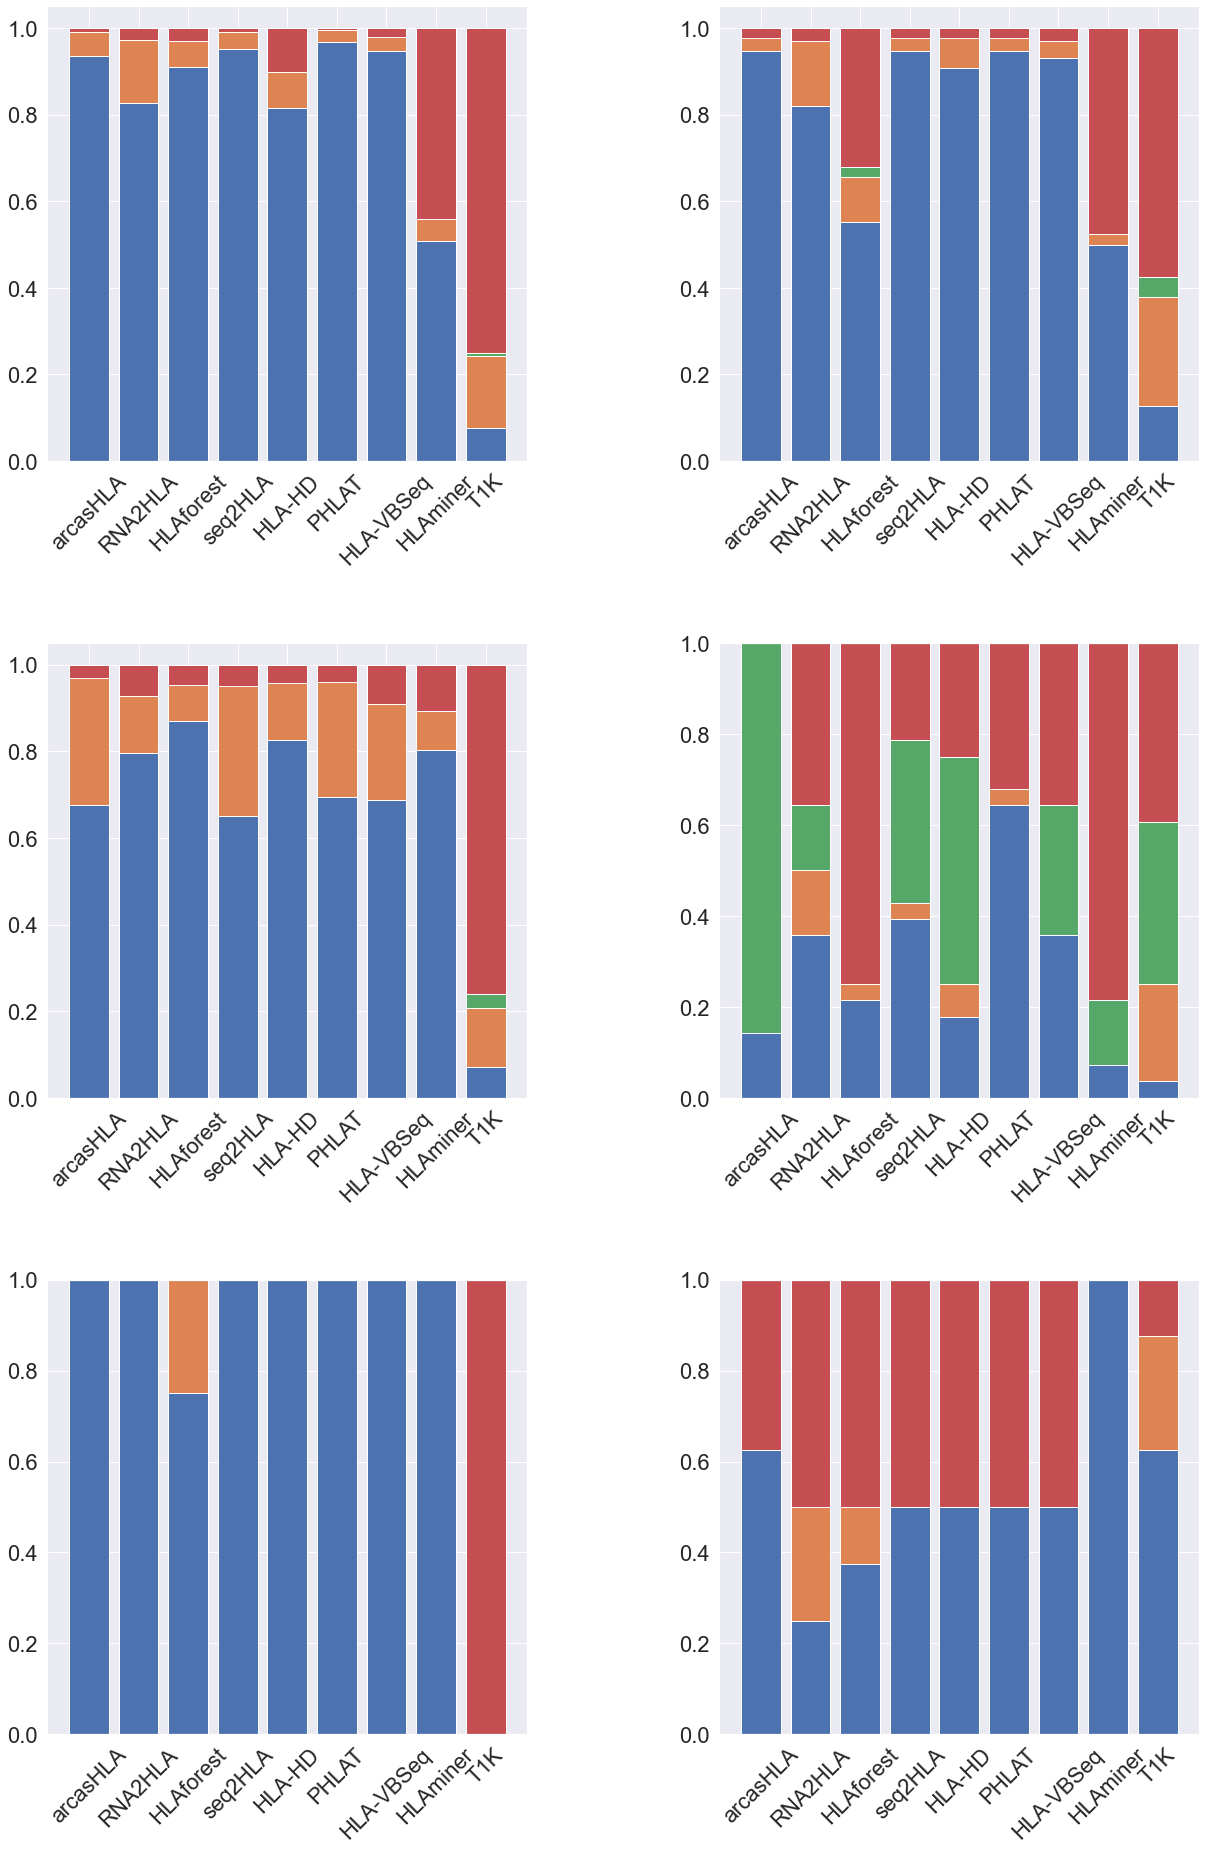

In [30]:
sns.set_context("paper")
sns.color_palette("pastel")
sns.set(font_scale=2)

labels=["arcasHLA","RNA2HLA","HLAforest","seq2HLA","HLA-HD","PHLAT","HLA-VBSeq","HLAminer","T1K", "HISAT"]

fig, ax = plt.subplots(3, 2,figsize=(20, 30))

idx = 1

for r in range(3):
    for c in range(2):
        dat = df.iloc[idx]
        dat =np.array([np.array(x) for x in dat])
        nocall_dat = no_call_data[:,idx-1]
        idx = idx+1
        
        total = (np.sum(np.sum(dat,axis=1),axis=1)+nocall_dat)
        
        fourdig = np.sum(dat[:,2],axis=1)/total
        twodig = np.sum(dat[:,1],axis=1)/total
        nocall = nocall_dat/total
        miscall = 1-fourdig-twodig-nocall
        
        ax[r][c].bar(tools,fourdig)
        ax[r][c].bar(tools,twodig,bottom=fourdig)
        ax[r][c].bar(tools,nocall,bottom=twodig+fourdig)
        ax[r][c].bar(tools,miscall,bottom=twodig+fourdig+nocall)
        
        ax[r][c].set_xticklabels(labels = labels, rotation = 45)
        
plt.subplots_adjust(left=0.1,
            bottom=0.1, 
            right=0.9, 
            top=0.9, 
            wspace=0.4, 
            hspace=0.4)


range(0, 2)
